In [ ]:
%run "simulation_function.ipynb"

In [12]:
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns
import time
from joblib import Parallel, delayed
import multiprocessing
import pandas as pd


In [8]:
numcores = multiprocessing.cpu_count()
numcores

8

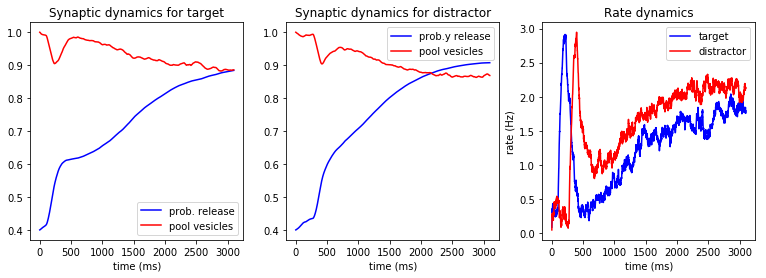

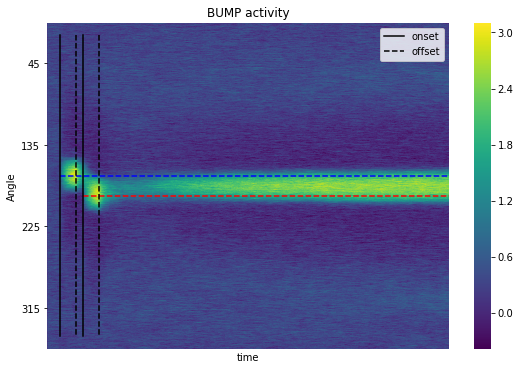

Simulation time: 33.4s


(11.99, 100)

In [13]:
# simulation(totalTime=6200, targ_onset = 200,
#            dist_onset=550, presentation_period=250,
#            separation=16, plots=True, sigE=0.7 )

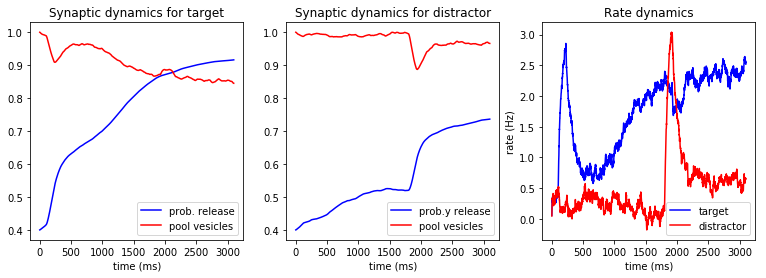

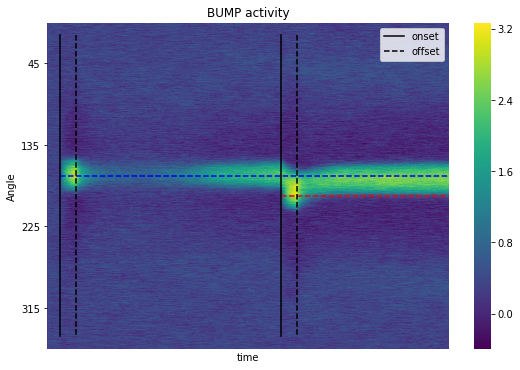

Simulation time: 46.7s


(5.59, 3150)

In [14]:
# simulation(totalTime=6200, targ_onset = 200,
#            dist_onset=3600, presentation_period=250,
#            separation=16, plots=True, sigE=0.7 )

In [11]:
## Discrete condition (simulations)
short_delay_cond = [450+100 for i in range(100)]
long_delay_cond = [450+3500 for i in range(100)]
onset_distractor_discrete = short_delay_cond + long_delay_cond

lns =  np.linspace(450, 5800, 100) #
onset_distractor_cont = 2*[int(lns[i]) for i in range(len(lns))]

In [ ]:
outputs_discrete = Parallel(n_jobs = numcores)(delayed(simulation)(totalTime=6200, targ_onset=200,
                               dist_onset=Onset, presentation_period=250,
                               separation=16, plots=False, sigE=0.06 ) for Onset in onset_distractor_discrete) 

In [ ]:
dfd = pd.DataFrame(outputs_discrete)
dfd.columns=['interference', 'delay']

## Interesting conditions
h = sns.factorplot( x="delay", y="interference", kind='bar', data=dfd, size=6, aspect=1)
plt.gca().title.set_text('Main effect: Response')
plt.gca().set_xlabel('delay')
plt.gca().set_ylabel('Interference')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show(block=False)

dfd.loc[dfd['delay']==-3650, 'delay']=7
dfd.loc[dfd['delay']==-700, 'delay']=0.2
dfd['order']=2
dfd.to_excel('order_2.xlsx')

In [ ]:
# outputs_continuous = Parallel(n_jobs = numcores)(delayed(simulation)(totalTime=6200, targ_onset=200,
#                                dist_onset=Onset, presentation_period=250,
#                                separation=16, plots=False, sigE=0.06 ) for Onset in onset_distractor_cont) 

# df = pd.DataFrame(outputs_continuous)
# df.columns=['interference', 'delay']


# ## Continuous
# fig = plt.figure()
# fig.set_size_inches(10, 4)
# fig.tight_layout()
# fig.suptitle('Interference')
# ax1 = fig.add_subplot(111)
# sns.lineplot(ax= ax1, x="delay", y="interference", data=df)
# plt.show(block=False)